In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_excel(r'C:\Users\FX517ZM\Desktop\Data Science\Lesson-25 Final Exam Data\default of credit card clients.xls')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,male,high school,married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,male,high school,single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,male,university,single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,male,high school,married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [4]:
data.dtypes

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default       int64
dtype: object

In [5]:
data = data.drop(data[['ID']],axis=1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [7]:
data.iloc[:,1:].corr(numeric_only=True)['default']

AGE          0.013890
PAY_0        0.324794
PAY_2        0.263551
PAY_3        0.235253
PAY_4        0.216614
PAY_5        0.204149
PAY_6        0.186866
BILL_AMT1   -0.019644
BILL_AMT2   -0.014193
BILL_AMT3   -0.014076
BILL_AMT4   -0.010156
BILL_AMT5   -0.006760
BILL_AMT6   -0.005372
PAY_AMT1    -0.072929
PAY_AMT2    -0.058579
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT5    -0.055124
PAY_AMT6    -0.053183
default      1.000000
Name: default, dtype: float64

<Axes: >

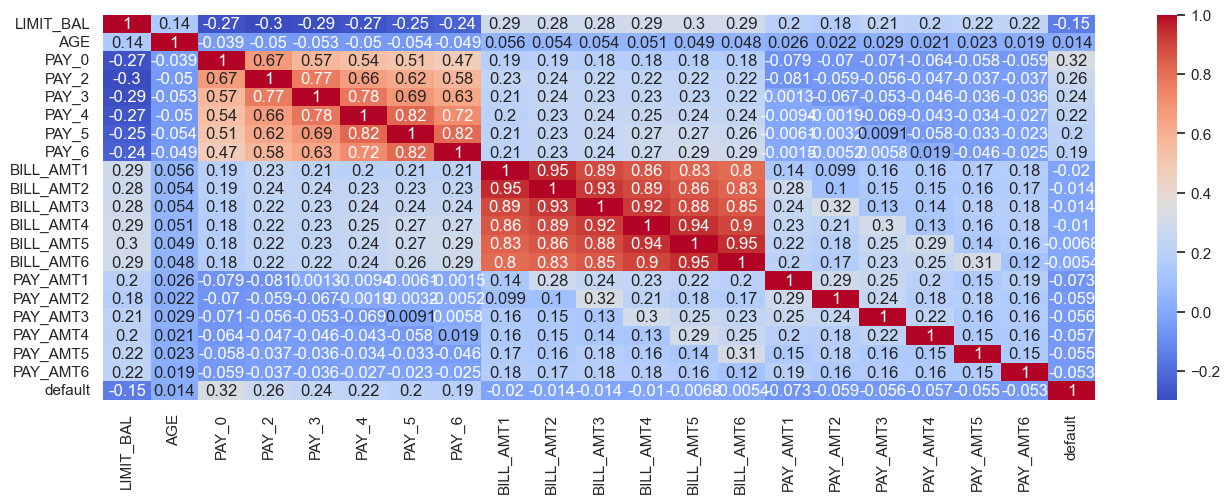

In [8]:
#LIMIT_BAL sutununun corr gostermirdi diyene heatmap yoxladim

plt.figure(figsize = (16,5))
sns.heatmap(data.corr(numeric_only=True),cmap='coolwarm',annot=True)

In [9]:
data = data[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default']]

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,1.145291,LIMIT_BAL
1,1.866151,PAY_0
2,3.119746,PAY_2
3,3.633879,PAY_3
4,4.341370,PAY_4
5,4.845040,PAY_5
6,3.313283,PAY_6


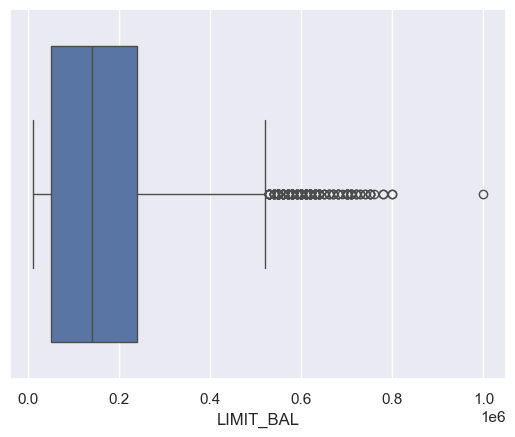

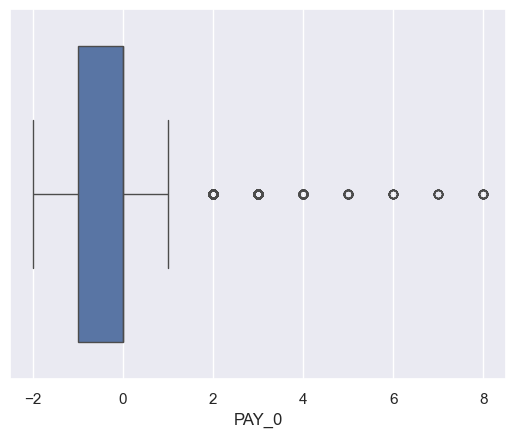

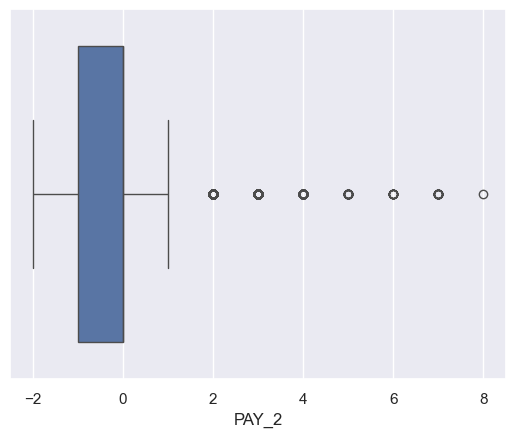

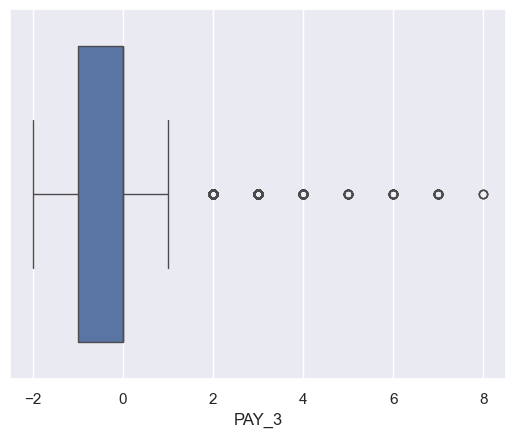

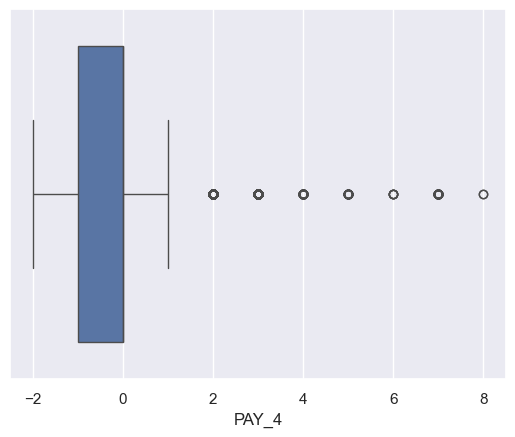

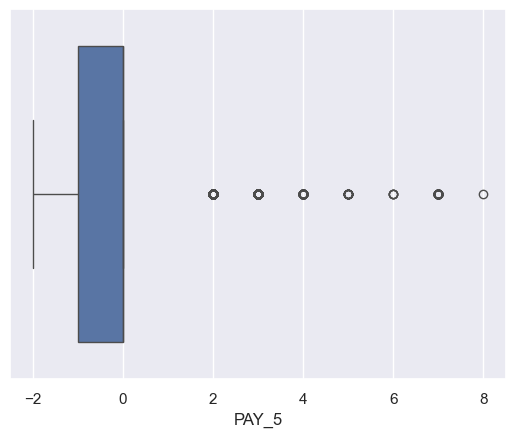

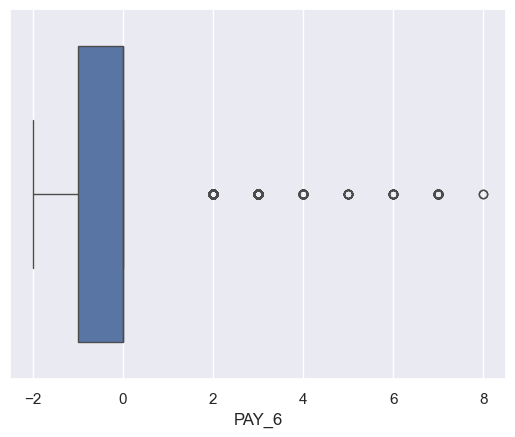

In [11]:
for i in data[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
    

In [12]:
q1=data[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].quantile(0.25)
q3=data[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [13]:
for i in data[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

C:\Users\FX517ZM\AppData\Local\Temp\ipykernel_28180\3426404359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
C:\Users\FX517ZM\AppData\Local\Temp\ipykernel_28180\3426404359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])


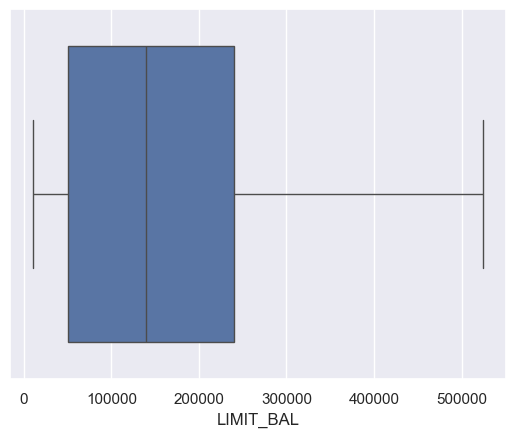

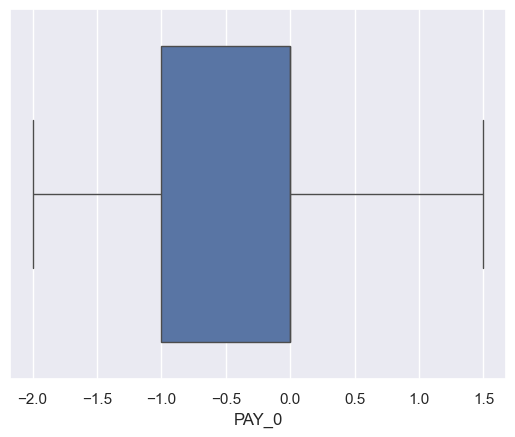

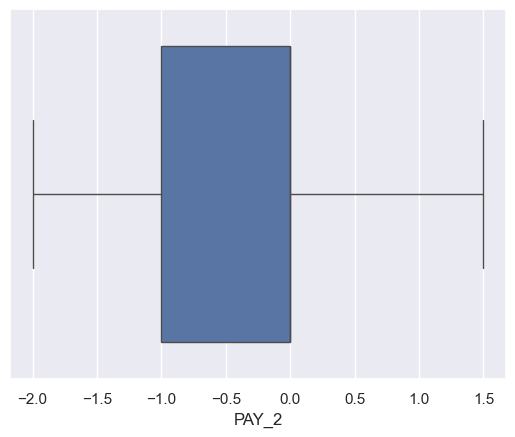

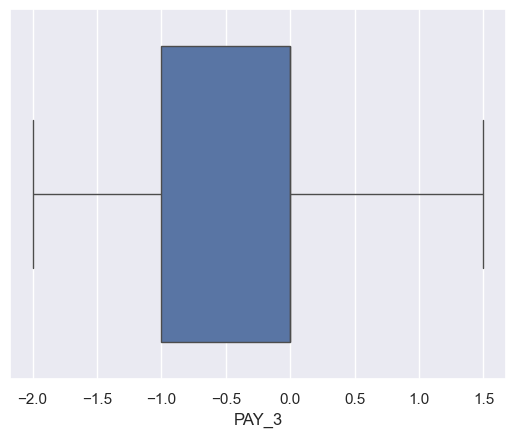

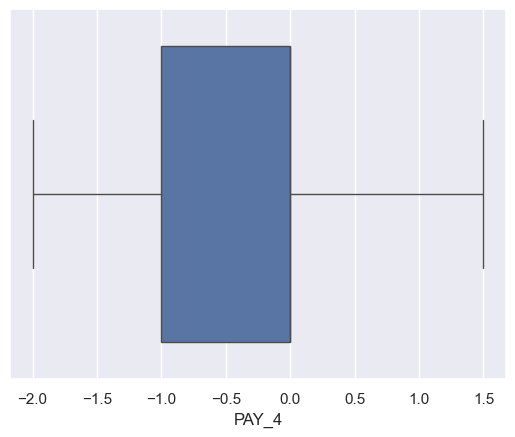

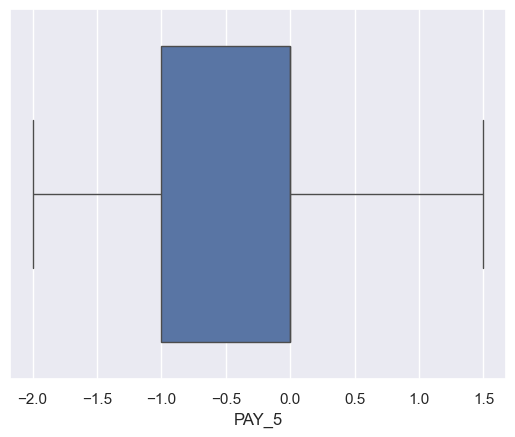

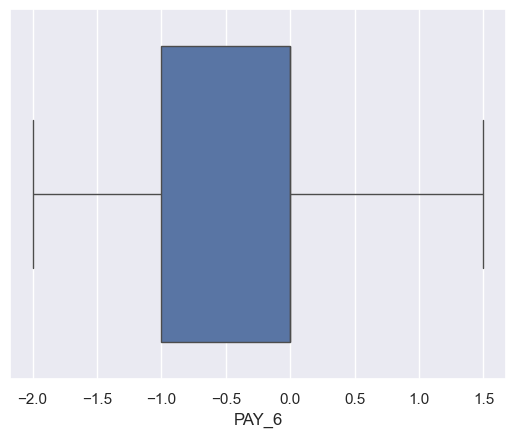

In [14]:
for i in data[['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()
    

In [15]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
default      0
dtype: int64

In [16]:
y = data['default']
x1 = data.drop(['default'],axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [18]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [19]:
from catboost import CatBoostClassifier

cb_str = CatBoostClassifier(cat_features=['SEX','EDUCATION','MARRIAGE'])

In [20]:
cb_str.fit(X_train, y_train)

Learning rate set to 0.037803
0:	learn: 0.6722616	total: 190ms	remaining: 3m 9s
1:	learn: 0.6528686	total: 234ms	remaining: 1m 56s
2:	learn: 0.6349967	total: 277ms	remaining: 1m 32s
3:	learn: 0.6187922	total: 317ms	remaining: 1m 18s
4:	learn: 0.6033730	total: 362ms	remaining: 1m 12s
5:	learn: 0.5899285	total: 405ms	remaining: 1m 7s
6:	learn: 0.5774085	total: 447ms	remaining: 1m 3s
7:	learn: 0.5665258	total: 476ms	remaining: 59.1s
8:	learn: 0.5557277	total: 520ms	remaining: 57.2s
9:	learn: 0.5457615	total: 565ms	remaining: 56s
10:	learn: 0.5368960	total: 607ms	remaining: 54.6s
11:	learn: 0.5288559	total: 651ms	remaining: 53.6s
12:	learn: 0.5214956	total: 693ms	remaining: 52.6s
13:	learn: 0.5146575	total: 738ms	remaining: 52s
14:	learn: 0.5084390	total: 779ms	remaining: 51.2s
15:	learn: 0.5025417	total: 819ms	remaining: 50.4s
16:	learn: 0.4975211	total: 850ms	remaining: 49.2s
17:	learn: 0.4926242	total: 894ms	remaining: 48.8s
18:	learn: 0.4882799	total: 937ms	remaining: 48.4s
19:	learn: 

Model Performance
Gini prob is 52.48367201994433
[[6660  380]
 [1245  715]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.65      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



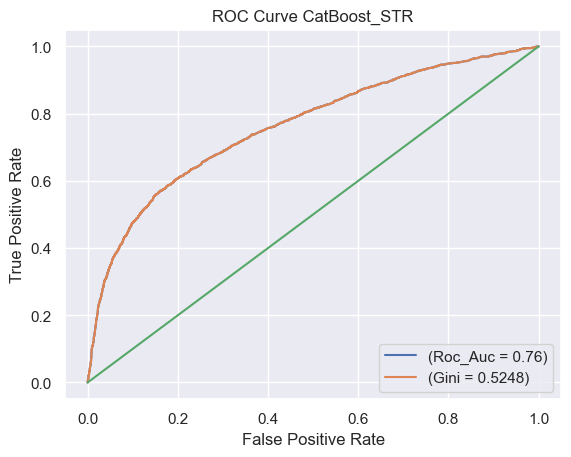

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

result = evaluate(cb_str, X_test, y_test)
y_prob = cb_str.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost_STR')

plt.legend(loc='lower right')
plt.show()

In [22]:
data1 = data.copy()

In [23]:
import numpy as np
import pandas as pd

for var in data.columns[:-1]:
    if data[var].dtypes != object:
        q1 = data[var].quantile(0.25)
        q2 = data[var].quantile(0.5)
        q3 = data[var].quantile(0.75)

        ranges = [-np.inf, q1, q2, q3, np.inf]
        data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')

        grouped = data.groupby(['category_' + var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
        grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
        data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
        
data

C:\Users\FX517ZM\AppData\Local\Temp\ipykernel_28180\3669748245.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,category_PAY_2,PAY_2_woe,category_PAY_3,PAY_3_woe,category_PAY_4,PAY_4_woe,category_PAY_5,PAY_5_woe,category_PAY_6,PAY_6_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,...,"(0.0, inf]",-1.491367,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]",0.273392,"(-inf, -1.0]",0.231318
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,...,"(0.0, inf]",-1.491367,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(0.0, inf]",-1.351641
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,...,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,...,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,...,"(-1.0, 0.0]",0.406083,"(-inf, -1.0]",0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,...,"(-1.0, 0.0]",0.406083,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,"(-inf, -1.0]",0.337385,"(-inf, -1.0]",0.341798,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,...,"(0.0, inf]",-1.491367,"(0.0, inf]",-1.349421,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,...,"(-inf, -1.0]",0.337385,"(-1.0, 0.0]",0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-inf, -1.0]",0.231318


In [24]:
data.isnull().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
default               0
category_LIMIT_BAL    0
LIMIT_BAL_woe         0
category_PAY_0        0
PAY_0_woe             0
category_PAY_2        0
PAY_2_woe             0
category_PAY_3        0
PAY_3_woe             0
category_PAY_4        0
PAY_4_woe             0
category_PAY_5        0
PAY_5_woe             0
category_PAY_6        0
PAY_6_woe             0
dtype: int64

In [25]:
for var in data.columns:
    if data[var].dtypes==object:
        grouped = data.groupby([var, 'default'])['default'].count().unstack().reset_index()

        grouped['positive_prop'] = grouped[0] / grouped[0].sum()
        grouped['negative_prop'] = grouped[1] / grouped[1].sum()

        grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

        grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
        data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_3_woe,category_PAY_4,PAY_4_woe,category_PAY_5,PAY_5_woe,category_PAY_6,PAY_6_woe,SEX_woe,EDUCATION_woe,MARRIAGE_woe
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,...,0.341798,"(-inf, -1.0]",0.302386,"(-inf, -1.0]",0.273392,"(-inf, -1.0]",0.231318,0.079777,-0.091416,-0.076822
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,...,0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(0.0, inf]",-1.351641,0.079777,-0.091416,0.070563
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,...,0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,0.079777,-0.091416,0.070563
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,...,0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,0.079777,-0.091416,-0.076822
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,...,0.341798,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,-0.115154,-0.091416,-0.076822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,...,0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,-0.115154,-0.168463,-0.076822
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,...,0.341798,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,-0.115154,-0.168463,0.070563
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,...,-1.349421,"(-inf, -1.0]",0.302386,"(-1.0, 0.0]",0.200910,"(-1.0, 0.0]",0.201465,-0.115154,-0.091416,0.070563
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,...,0.295297,"(-1.0, 0.0]",0.235542,"(-1.0, 0.0]",0.200910,"(-inf, -1.0]",0.231318,-0.115154,-0.168463,-0.076822


In [26]:
data.isnull().sum()

LIMIT_BAL              0
SEX                    0
EDUCATION              0
MARRIAGE               0
PAY_0                  0
PAY_2                  0
PAY_3                  0
PAY_4                  0
PAY_5                  0
PAY_6                  0
default                0
category_LIMIT_BAL     0
LIMIT_BAL_woe          0
category_PAY_0         0
PAY_0_woe              0
category_PAY_2         0
PAY_2_woe              0
category_PAY_3         0
PAY_3_woe              0
category_PAY_4         0
PAY_4_woe              0
category_PAY_5         0
PAY_5_woe              0
category_PAY_6         0
PAY_6_woe              0
SEX_woe                0
EDUCATION_woe         14
MARRIAGE_woe           0
dtype: int64

In [27]:
for i in data[['EDUCATION_woe']]:
    if data[i].dtype == 'object':
        data[i].fillna(data[i].mode()[0], inplace=True)
    else:
        data[i].fillna(data[i].mean(), inplace=True)

In [28]:
data.isnull().sum()

LIMIT_BAL             0
SEX                   0
EDUCATION             0
MARRIAGE              0
PAY_0                 0
PAY_2                 0
PAY_3                 0
PAY_4                 0
PAY_5                 0
PAY_6                 0
default               0
category_LIMIT_BAL    0
LIMIT_BAL_woe         0
category_PAY_0        0
PAY_0_woe             0
category_PAY_2        0
PAY_2_woe             0
category_PAY_3        0
PAY_3_woe             0
category_PAY_4        0
PAY_4_woe             0
category_PAY_5        0
PAY_5_woe             0
category_PAY_6        0
PAY_6_woe             0
SEX_woe               0
EDUCATION_woe         0
MARRIAGE_woe          0
dtype: int64

In [29]:
woe_features = data.filter(regex='_woe$', axis=1)
woe_features.columns

Index(['LIMIT_BAL_woe', 'PAY_0_woe', 'PAY_2_woe', 'PAY_3_woe', 'PAY_4_woe',
       'PAY_5_woe', 'PAY_6_woe', 'SEX_woe', 'EDUCATION_woe', 'MARRIAGE_woe'],
      dtype='object')

In [30]:
inputs = data[['LIMIT_BAL_woe', 'PAY_0_woe', 'PAY_2_woe', 'PAY_3_woe', 'PAY_4_woe',
       'PAY_5_woe', 'PAY_6_woe', 'SEX_woe', 'EDUCATION_woe', 'MARRIAGE_woe']]
output = data['default']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

Model Performance
Gini prob is 50.099526032003695
[[6685  355]
 [1389  571]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7040
           1       0.62      0.29      0.40      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.62      0.64      9000
weighted avg       0.78      0.81      0.78      9000



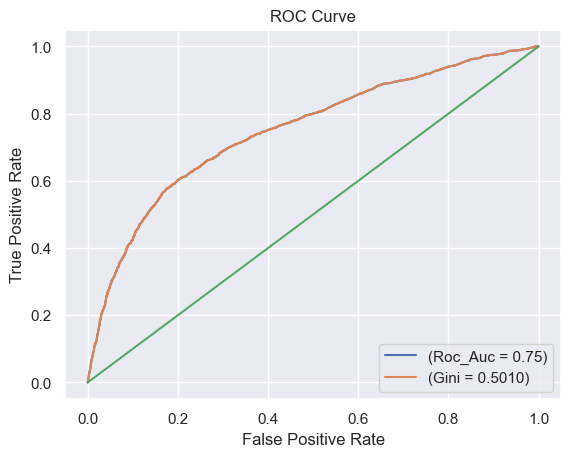

In [33]:
result = evaluate(clf, X_test, y_test)
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

In [34]:
data1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default
0,20000.0,female,university,married,1.5,1.5,-1.0,-1.0,-2.0,-2.0,1
1,120000.0,female,university,single,-1.0,1.5,0.0,0.0,0.0,1.5,1
2,90000.0,female,university,single,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50000.0,female,university,married,0.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,male,university,married,-1.0,0.0,-1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,male,high school,married,0.0,0.0,0.0,0.0,0.0,0.0,0
29996,150000.0,male,high school,single,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0
29997,30000.0,male,university,single,1.5,1.5,1.5,-1.0,0.0,0.0,1
29998,80000.0,male,high school,married,1.0,-1.0,0.0,0.0,0.0,-1.0,1


In [35]:
data_dum = pd.get_dummies(data1, drop_first=True).astype(int)

In [36]:
y2 = data_dum['default']
x2 = data_dum.drop(['default'],axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [39]:
def evaluate(X_test, y_test):

    models = [RandomForestClassifier(),svm.SVC(probability=True),
             CatBoostClassifier(),XGBClassifier(),LGBMClassifier()]
   
    for model in models:
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
        
            y_prob = model.predict_proba(X_test)[:,1]
        
            roc_prob = roc_auc_score(y_test, y_prob)
            
            gini_prob = roc_prob*2-1
            
            confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
            report = classification_report(y_test, y_pred)
            
            print('Model Performance')
        
            print('Gini prob is', gini_prob*100)
            print(report)
            print(model)
            print(confusion_matrix)
        
            y_prob = model.predict_proba(X_test)[:,1]
    
            roc_auc = roc_auc_score(y_test, y_prob)
            gini = (2*roc_auc_score(y_test, y_prob))-1
            
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            plt.figure()
            
            plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
            plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
            plt.plot([0, 1], [0, 1])
            plt.xlim()
            plt.ylim()
            
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            
            plt.legend(loc='lower right')
            plt.show()


In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Model Performance
Gini prob is 39.48556354359927
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      7040
           1       0.50      0.35      0.41      1960

    accuracy                           0.78      9000
   macro avg       0.67      0.63      0.64      9000
weighted avg       0.76      0.78      0.77      9000

RandomForestClassifier()
[[6359  681]
 [1279  681]]


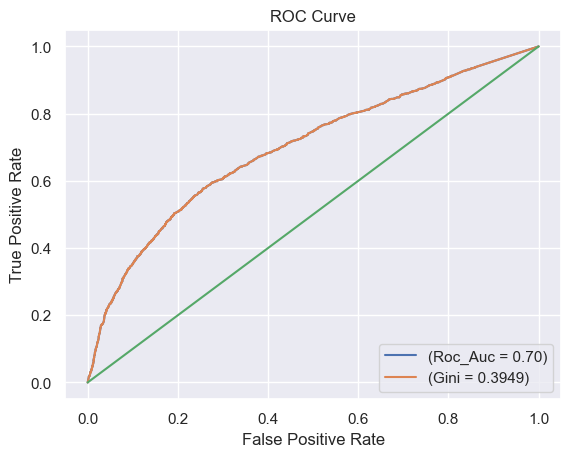

C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\FX517ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Model Performance
Gini prob is 13.881225359461968
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7040
           1       0.00      0.00      0.00      1960

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000

SVC(probability=True)
[[7040    0]
 [1960    0]]


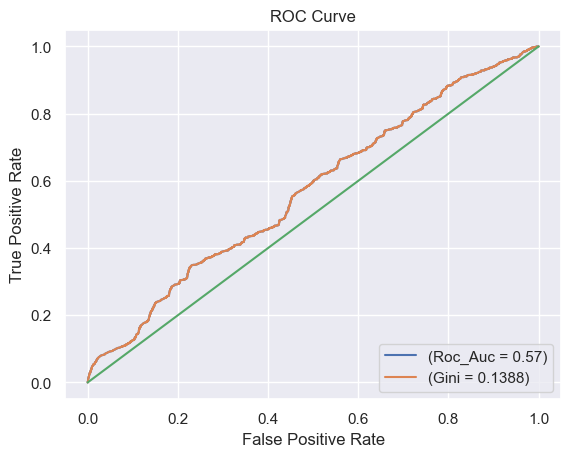

Learning rate set to 0.037803
0:	learn: 0.6721833	total: 7.18ms	remaining: 7.18s
1:	learn: 0.6530385	total: 14.1ms	remaining: 7.04s
2:	learn: 0.6355718	total: 21.3ms	remaining: 7.07s
3:	learn: 0.6194954	total: 27.9ms	remaining: 6.95s
4:	learn: 0.6048662	total: 34.4ms	remaining: 6.85s
5:	learn: 0.5916208	total: 41.6ms	remaining: 6.89s
6:	learn: 0.5796146	total: 48ms	remaining: 6.81s
7:	learn: 0.5679236	total: 55ms	remaining: 6.82s
8:	learn: 0.5571483	total: 62ms	remaining: 6.82s
9:	learn: 0.5475054	total: 68.9ms	remaining: 6.82s
10:	learn: 0.5388062	total: 75.7ms	remaining: 6.81s
11:	learn: 0.5306209	total: 83ms	remaining: 6.83s
12:	learn: 0.5234984	total: 88.7ms	remaining: 6.73s
13:	learn: 0.5168379	total: 95.7ms	remaining: 6.74s
14:	learn: 0.5105202	total: 103ms	remaining: 6.75s
15:	learn: 0.5048641	total: 110ms	remaining: 6.75s
16:	learn: 0.4997031	total: 117ms	remaining: 6.77s
17:	learn: 0.4949577	total: 124ms	remaining: 6.76s
18:	learn: 0.4906802	total: 131ms	remaining: 6.75s
19:	l

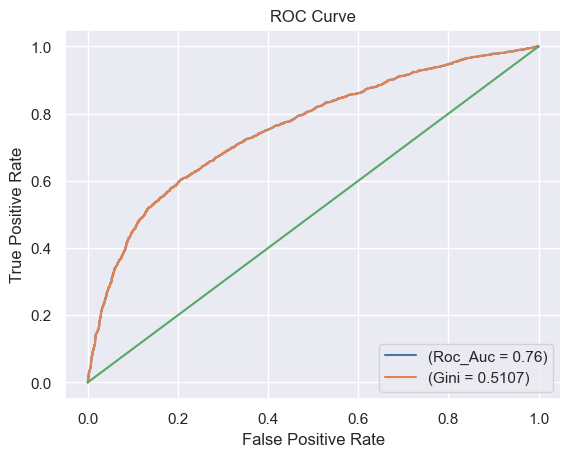

Model Performance
Gini prob is 48.62747130102041
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      7040
           1       0.57      0.37      0.45      1960

    accuracy                           0.80      9000
   macro avg       0.71      0.64      0.66      9000
weighted avg       0.78      0.80      0.79      9000

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=N

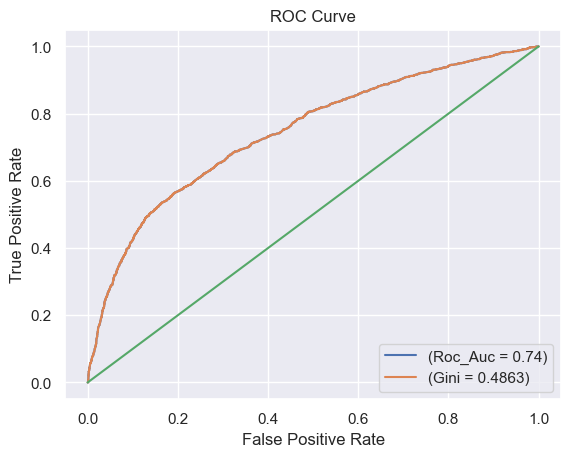

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Model Performance
Gini prob is 51.50487012987015
              precision    recall  f1-score   support

           0       0.84      0.93      0.89      7040
           1       0.61      0.37      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79 

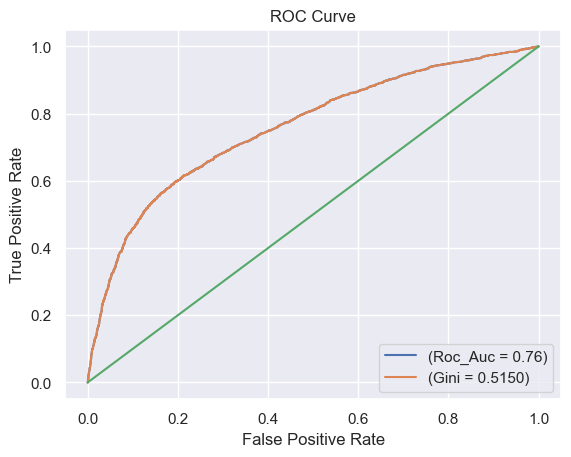

In [41]:
evaluate(X_test, y_test)

#CatBoostClassifier(cat_features=['SEX','EDUCATION','MARRIAGE']) en boyuk gini veren model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [43]:
cb_str = CatBoostClassifier(cat_features=['SEX','EDUCATION','MARRIAGE'])
cb_str.fit(X_train, y_train)

Learning rate set to 0.037803
0:	learn: 0.6722616	total: 40.4ms	remaining: 40.3s
1:	learn: 0.6528686	total: 87.9ms	remaining: 43.9s
2:	learn: 0.6349967	total: 128ms	remaining: 42.5s
3:	learn: 0.6187922	total: 172ms	remaining: 42.7s
4:	learn: 0.6033730	total: 216ms	remaining: 42.9s
5:	learn: 0.5899285	total: 259ms	remaining: 42.9s
6:	learn: 0.5774085	total: 301ms	remaining: 42.6s
7:	learn: 0.5665258	total: 331ms	remaining: 41s
8:	learn: 0.5557277	total: 372ms	remaining: 41s
9:	learn: 0.5457615	total: 415ms	remaining: 41s
10:	learn: 0.5368960	total: 457ms	remaining: 41.1s
11:	learn: 0.5288559	total: 499ms	remaining: 41.1s
12:	learn: 0.5214956	total: 542ms	remaining: 41.1s
13:	learn: 0.5146575	total: 585ms	remaining: 41.2s
14:	learn: 0.5084390	total: 627ms	remaining: 41.1s
15:	learn: 0.5025417	total: 668ms	remaining: 41.1s
16:	learn: 0.4975211	total: 700ms	remaining: 40.5s
17:	learn: 0.4926242	total: 744ms	remaining: 40.6s
18:	learn: 0.4882799	total: 787ms	remaining: 40.6s
19:	learn: 0.48

In [44]:
distributions_cb_str = {
    'iterations': [10, 50, 100, 500, 1000], 
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 5, 7, 9],
    'l2_leaf_reg': np.linspace(2, 30, num=7)}

distributions_cb_str

{'iterations': [10, 50, 100, 500, 1000],
 'learning_rate': [0.01, 0.1, 1.0],
 'depth': [3, 5, 7, 9],
 'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
        25.33333333, 30.        ])}

In [45]:
random_search_cb_str = RandomizedSearchCV(cb_str,
                                   param_distributions=distributions_cb_str,
                                   n_iter=1,
                                   cv=3,
                                   n_jobs=-1,
                                   random_state=42)
random_search_cb_str.fit(X_train, y_train)

0:	learn: 0.6877180	total: 24ms	remaining: 24s
1:	learn: 0.6823307	total: 46.7ms	remaining: 23.3s
2:	learn: 0.6771570	total: 73.2ms	remaining: 24.3s
3:	learn: 0.6721454	total: 101ms	remaining: 25s
4:	learn: 0.6671727	total: 126ms	remaining: 25.1s
5:	learn: 0.6623985	total: 151ms	remaining: 25s
6:	learn: 0.6576318	total: 178ms	remaining: 25.2s
7:	learn: 0.6529165	total: 202ms	remaining: 25.1s
8:	learn: 0.6482516	total: 228ms	remaining: 25.1s
9:	learn: 0.6437824	total: 254ms	remaining: 25.2s
10:	learn: 0.6394052	total: 280ms	remaining: 25.1s
11:	learn: 0.6350834	total: 307ms	remaining: 25.2s
12:	learn: 0.6309356	total: 333ms	remaining: 25.3s
13:	learn: 0.6269152	total: 362ms	remaining: 25.5s
14:	learn: 0.6228276	total: 387ms	remaining: 25.4s
15:	learn: 0.6189654	total: 412ms	remaining: 25.3s
16:	learn: 0.6151491	total: 437ms	remaining: 25.3s
17:	learn: 0.6114163	total: 463ms	remaining: 25.3s
18:	learn: 0.6076814	total: 493ms	remaining: 25.4s
19:	learn: 0.6041233	total: 519ms	remaining: 2

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000015589F07610>,
                   n_iter=1, n_jobs=-1,
                   param_distributions={'depth': [3, 5, 7, 9],
                                        'iterations': [10, 50, 100, 500, 1000],
                                        'l2_leaf_reg': array([ 2.        ,  6.66666667, 11.33333333, 16.        , 20.66666667,
       25.33333333, 30.        ]),
                                        'learning_rate': [0.01, 0.1, 1.0]},
                   random_state=42)

In [46]:
print("Best Hyperparameters for CB_STR: ", random_search_cb_str.best_params_)

Best Hyperparameters for CB_STR:  {'learning_rate': 0.01, 'l2_leaf_reg': 30.0, 'iterations': 1000, 'depth': 3}


In [47]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(report)
    print(confusion_matrix)

In [48]:
optimized_model_cb_str = random_search_cb_str.best_estimator_
optmized_accuracy_lgb = evaluate(optimized_model_cb_str, X_test, y_test)


Model Performance
Gini prob is 52.97356939935065
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.66      0.36      0.47      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

[[6674  366]
 [1254  706]]


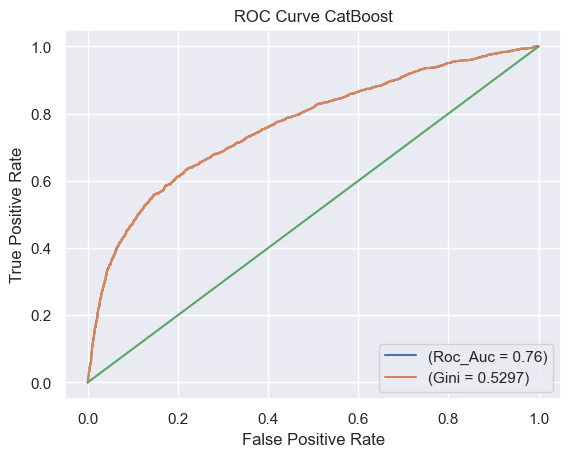

In [49]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = optimized_model_cb_str.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve CatBoost')

plt.legend(loc='lower right')
plt.show()

In [50]:
from mlxtend.classifier import StackingCVClassifier

In [51]:
base_classifiers = [
    LGBMClassifier(),
    XGBClassifier()]

meta_classifier = CatBoostClassifier()

In [52]:
stacking_classifier = StackingCVClassifier(classifiers=base_classifiers,
                                           meta_classifier=meta_classifier,
                                           cv=5,
                                           use_probas=True,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [54]:
stacking_classifier.fit(X_train, y_train)

Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3740, number of negative: 13060
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222619 -> initscore=-1.250469
[LightGBM] [Info] Start training from score -1.250469
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3741, number of negative: 13059
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000282 seconds.
You can set `force_row_wise=true` to remove 

StackingCVClassifier(classifiers=[LGBMClassifier(),
                                  XGBClassifier(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=N...
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                     cv=5,
                     meta_classifier=<catboost.core.CatBoostClassifier object at 0x0000015589EEDBD0>,
                     random_state=42, use_features_in_secondary=True,
                     use_probas=True, verbose=1)

In [55]:
result_stacking = evaluate(stacking_classifier, X_test, y_test)

Model Performance
Gini prob is 50.42125898654915
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.61      0.36      0.45      1960

    accuracy                           0.81      9000
   macro avg       0.72      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000

[[6592  448]
 [1261  699]]


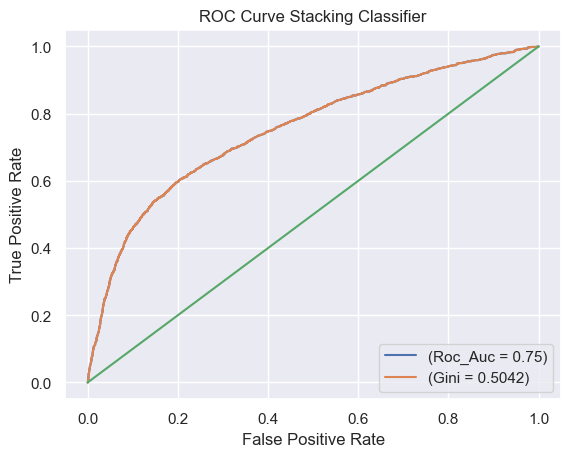

In [56]:
y_prob = stacking_classifier.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.4f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Stacking Classifier')

plt.legend(loc='lower right')
plt.show()

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state=42)

In [58]:
def evaluate(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:,1]

    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)

In [59]:
cb = CatBoostClassifier()
cb.fit(X_train, y_train)

Learning rate set to 0.037803
0:	learn: 0.6721833	total: 7.22ms	remaining: 7.21s
1:	learn: 0.6530385	total: 14.1ms	remaining: 7.03s
2:	learn: 0.6355718	total: 20.9ms	remaining: 6.93s
3:	learn: 0.6194954	total: 27.9ms	remaining: 6.94s
4:	learn: 0.6048662	total: 34.5ms	remaining: 6.86s
5:	learn: 0.5916208	total: 41.4ms	remaining: 6.85s
6:	learn: 0.5796146	total: 47.7ms	remaining: 6.77s
7:	learn: 0.5679236	total: 54.8ms	remaining: 6.8s
8:	learn: 0.5571483	total: 61.7ms	remaining: 6.79s
9:	learn: 0.5475054	total: 68.2ms	remaining: 6.75s
10:	learn: 0.5388062	total: 75.1ms	remaining: 6.75s
11:	learn: 0.5306209	total: 82.1ms	remaining: 6.76s
12:	learn: 0.5234984	total: 87.7ms	remaining: 6.66s
13:	learn: 0.5168379	total: 94.7ms	remaining: 6.67s
14:	learn: 0.5105202	total: 102ms	remaining: 6.67s
15:	learn: 0.5048641	total: 108ms	remaining: 6.65s
16:	learn: 0.4997031	total: 115ms	remaining: 6.64s
17:	learn: 0.4949577	total: 122ms	remaining: 6.66s
18:	learn: 0.4906802	total: 129ms	remaining: 6.65

In [60]:
variables = []
train_gini_scores = []
test_gini_scores = []


for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    
    cb.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = cb.predict_proba(X_train_single_var)[:, 1]

    train_roc = roc_auc_score(y_train, y_pred_train_single_var)
    train_gini = 2 * train_roc - 1

    
    y_pred_test_single_var = cb.predict_proba(X_test_single_var)[:, 1]

    test_roc = roc_auc_score(y_test, y_pred_test_single_var)
    test_gini = 2 * test_roc - 1


    variables.append(i)
    train_gini_scores.append(train_gini)
    test_gini_scores.append(test_gini)


results_df = pd.DataFrame({
                            'Variable': variables,
                            'Train Gini': train_gini_scores,
                            'Test Gini': test_gini_scores
                        })

results_df_sorted = results_df.sort_values(by='Test Gini', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


Learning rate set to 0.037803
0:	learn: 0.6787959	total: 5.86ms	remaining: 5.85s
1:	learn: 0.6656611	total: 11.7ms	remaining: 5.82s
2:	learn: 0.6534791	total: 16.8ms	remaining: 5.59s
3:	learn: 0.6421909	total: 22.6ms	remaining: 5.63s
4:	learn: 0.6318878	total: 28.1ms	remaining: 5.6s
5:	learn: 0.6224634	total: 33.5ms	remaining: 5.55s
6:	learn: 0.6138587	total: 39ms	remaining: 5.53s
7:	learn: 0.6058328	total: 45.5ms	remaining: 5.64s
8:	learn: 0.5985622	total: 51.3ms	remaining: 5.65s
9:	learn: 0.5918541	total: 56.7ms	remaining: 5.62s
10:	learn: 0.5857240	total: 62.6ms	remaining: 5.63s
11:	learn: 0.5800141	total: 68.4ms	remaining: 5.63s
12:	learn: 0.5747654	total: 74ms	remaining: 5.62s
13:	learn: 0.5699736	total: 79.6ms	remaining: 5.6s
14:	learn: 0.5656466	total: 84.6ms	remaining: 5.55s
15:	learn: 0.5616289	total: 90.2ms	remaining: 5.55s
16:	learn: 0.5579174	total: 95.7ms	remaining: 5.53s
17:	learn: 0.5545079	total: 102ms	remaining: 5.58s
18:	learn: 0.5513441	total: 108ms	remaining: 5.56s


,Variable,Train Gini,Test Gini
1,PAY_0,0.4017,0.3886
2,PAY_2,0.3130,0.2733
3,PAY_3,0.2759,0.2427
4,PAY_4,0.2415,0.2283
0,LIMIT_BAL,0.2503,0.2248
5,PAY_5,0.2174,0.2192
6,PAY_6,0.2076,0.1914
7,SEX_male,0.0510,0.0381
13,MARRIAGE_single,0.0368,0.0367
8,EDUCATION_high school,0.0278,0.0314


En yaxsi model CatBoostClassifier(cat_features=['SEX','EDUCATION','MARRIAGE']) modeli string columnlari ile